In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature.

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"/content/drive/MyDrive/Internship_2024/Project/data.xlsx - Sheet1.csv")

In [88]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,2013-07-01,2024-02-23,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
df['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

In [6]:
# We don't need "Unnamed: 0" this column because it has a common value and it is not impacting anything on the analysis
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
df.info()
# In the below description the data type of "DOJ" and "DOB" is of object type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [8]:
# Converting the data type of DOJ and DOB columns to date time data type
df["DOJ"]=pd.to_datetime(df["DOJ"])
df["DOB"]=pd.to_datetime(df["DOB"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [10]:
# Checking Null values
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [11]:
df['DOL'].iloc[4]


'3/1/15 0:00'

In [12]:
# Convert the "present value" of DOL column to NaN.
df["DOL"]=df["DOL"].apply(lambda x: np.nan  if x=="present" else x)

In [13]:
df["DOL"]

0                NaN
1                NaN
2                NaN
3                NaN
4        3/1/15 0:00
            ...     
3993    10/1/12 0:00
3994     7/1/13 0:00
3995             NaN
3996     1/1/15 0:00
3997             NaN
Name: DOL, Length: 3998, dtype: object

In [14]:
# Fill the NaN value to Today's date.
df["DOL"]=df["DOL"].fillna(pd.to_datetime('today').date())

In [15]:
# Convert the data type to Datetime
df["DOL"]=pd.to_datetime(df["DOL"])

In [16]:
df.select_dtypes("object")

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
...,...,...,...,...,...,...,...,...
3993,software engineer,New Delhi,m,cbse,cbse,B.Tech/B.E.,information technology,Haryana
3994,technical writer,Hyderabad,f,state board,state board,B.Tech/B.E.,electronics and communication engineering,Telangana
3995,associate software engineer,Bangalore,m,"bse,odisha","chse,odisha",B.Tech/B.E.,computer engineering,Orissa
3996,software developer,Asifabadbanglore,f,state board,state board,B.Tech/B.E.,computer science & engineering,Karnataka


In [17]:
df.select_dtypes(["int64","float64"])

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,85.60,2007,83.60,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,52.09,2006,55.50,6268,2,61.50,6268,0,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,90.00,2009,93.00,4883,2,77.30,4883,1,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,81.86,2008,65.50,9786,2,70.00,9786,0,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,78.72,2010,69.88,979,2,70.42,979,1,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [18]:
df.select_dtypes(["int64","float64"]).describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


Statistical Analysis:
             Salary  10percentage  12percentage   collegeGPA      English  \
count  3.998000e+03   3998.000000   3998.000000  3998.000000  3998.000000   
mean   3.076998e+05     77.925443     74.466366    71.486171   501.649075   
std    2.127375e+05      9.850162     10.999933     8.167338   104.940021   
min    3.500000e+04     43.000000     40.000000     6.450000   180.000000   
25%    1.800000e+05     71.680000     66.000000    66.407500   425.000000   
50%    3.000000e+05     79.150000     74.400000    71.720000   500.000000   
75%    3.700000e+05     85.670000     82.600000    76.327500   570.000000   
max    4.000000e+06     97.760000     98.700000    99.930000   875.000000   

           Logical        Quant  conscientiousness  agreeableness  \
count  3998.000000  3998.000000        3998.000000    3998.000000   
mean    501.598799   513.378189          -0.037831       0.146496   
std      86.783297   122.302332           1.028666       0.941782   
min     

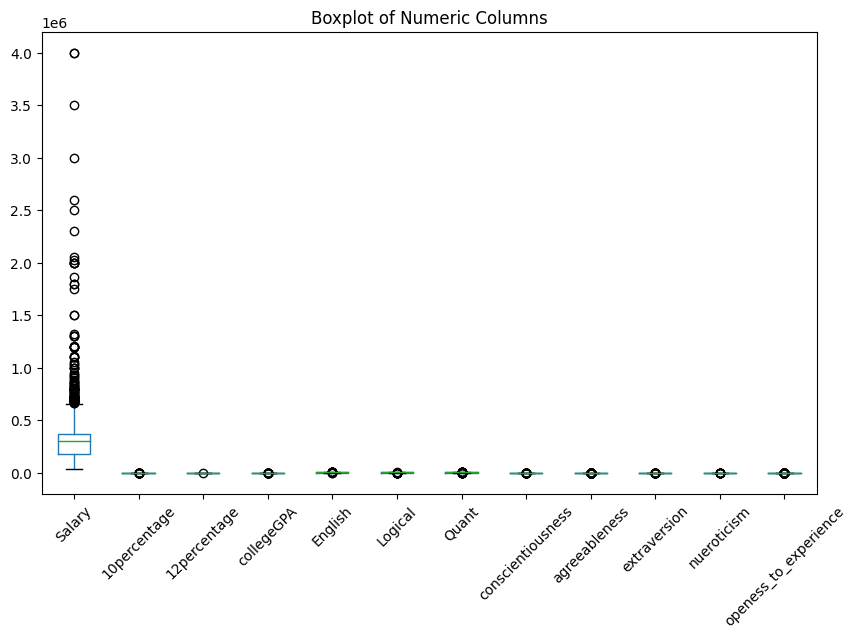

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def describe_statistics(df, columns=None):
    if columns:
        return df[columns].describe()
    else:
        return df.describe()

def box_plot(df, columns=None):
    if columns:
        df[columns].boxplot(grid=False, figsize=(10, 6))
        plt.xticks(rotation=45)
        plt.title("Boxplot of Numeric Columns")
        plt.show()
    else:
        print("Please provide a list of columns to generate box plot.")

# Columns on which to apply describe function
columns_to_describe=['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

# Performing statistical analysis similar to describe() for specified columns
statistics = describe_statistics(df, columns_to_describe)
print("Statistical Analysis:")
print(statistics)

# Generating box plot for specified columns
box_plot(df, columns_to_describe)

Statistics for column 'Salary':
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

Statistics for column '10percentage':
count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64

Statistics for column '12percentage':
count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64

Statistics for column 'collegeGPA':
count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

Statistics for column 'English':
count  

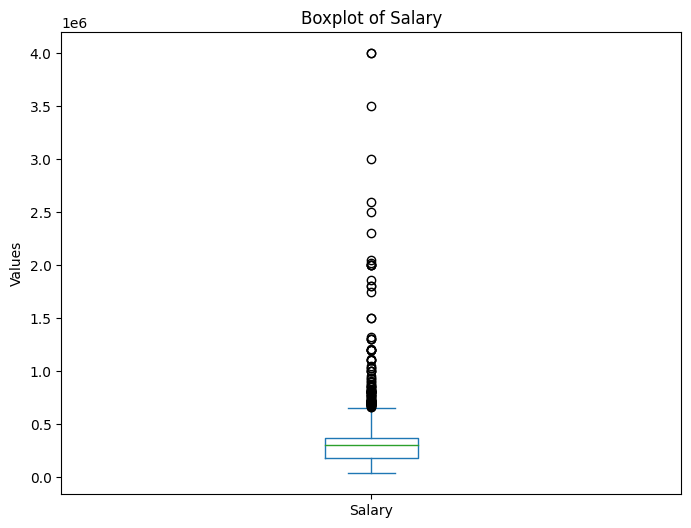

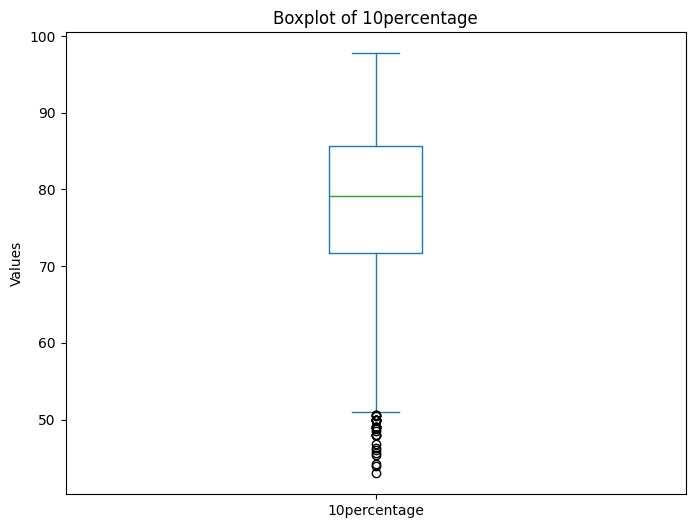

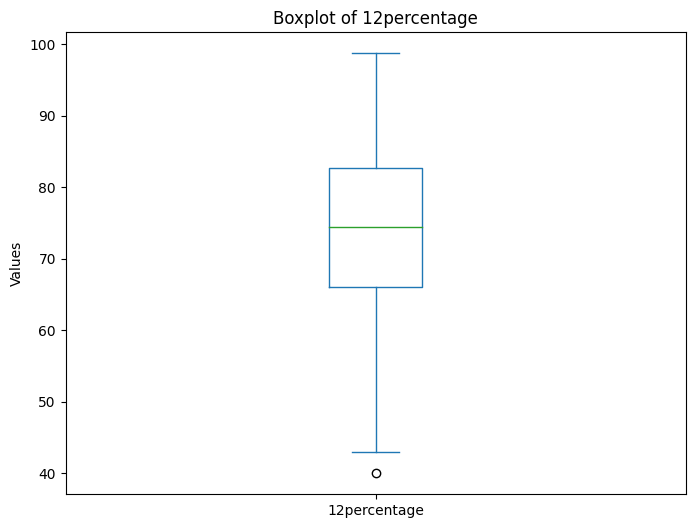

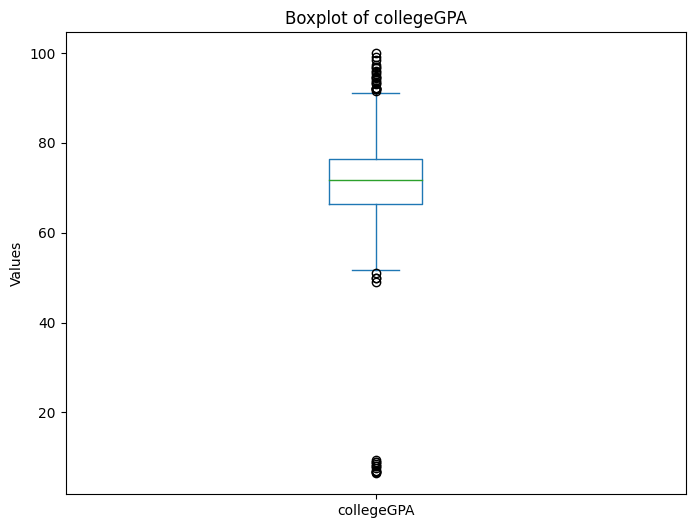

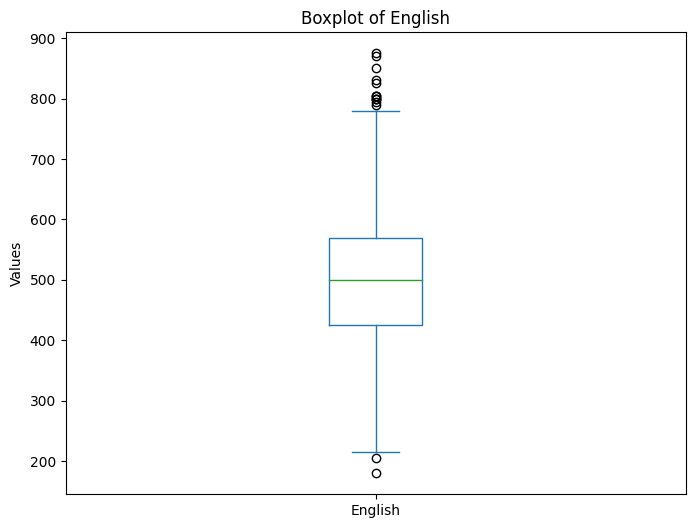

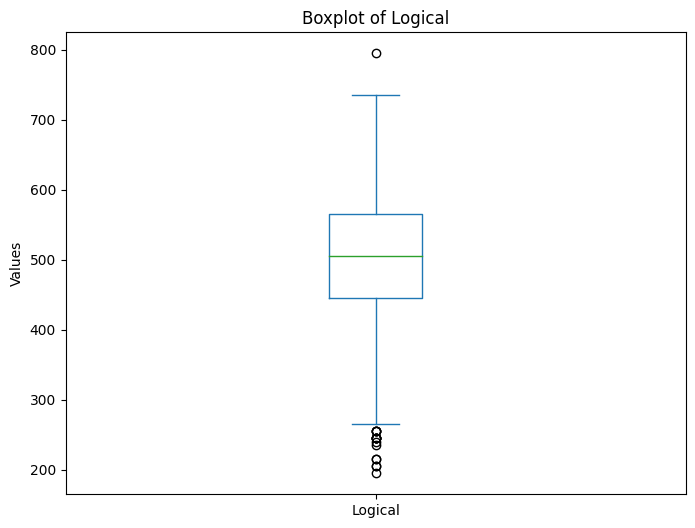

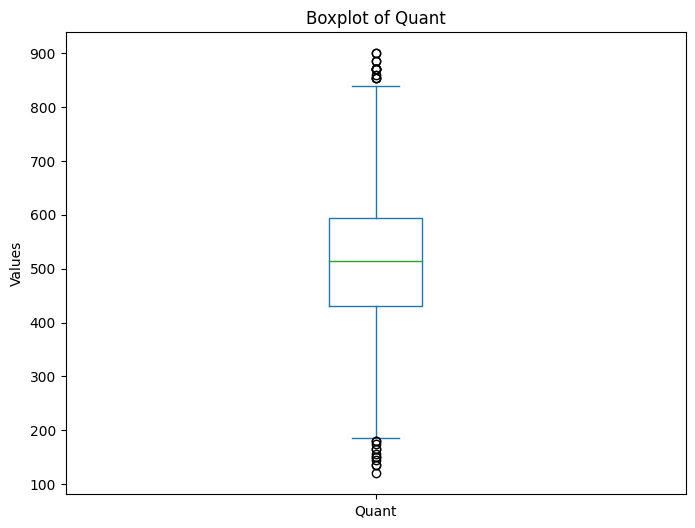

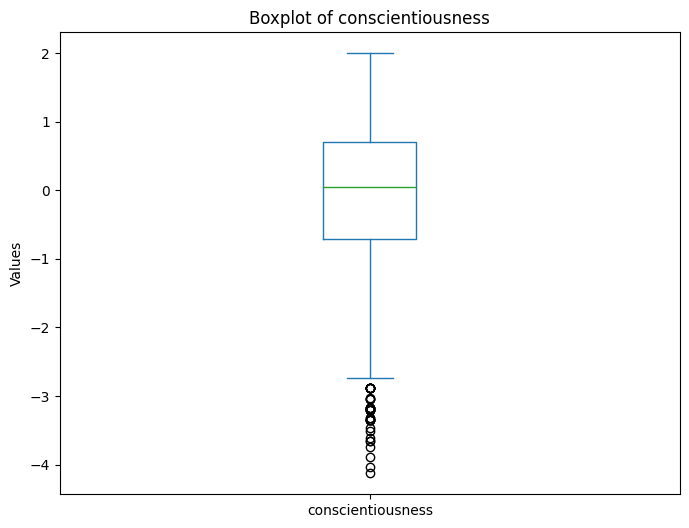

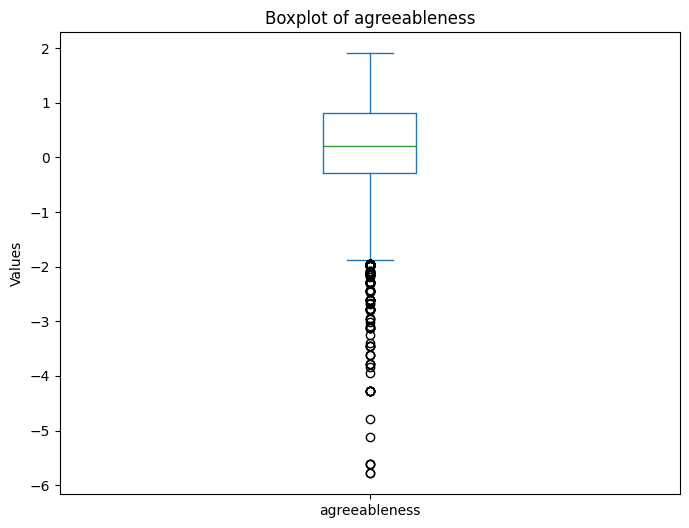

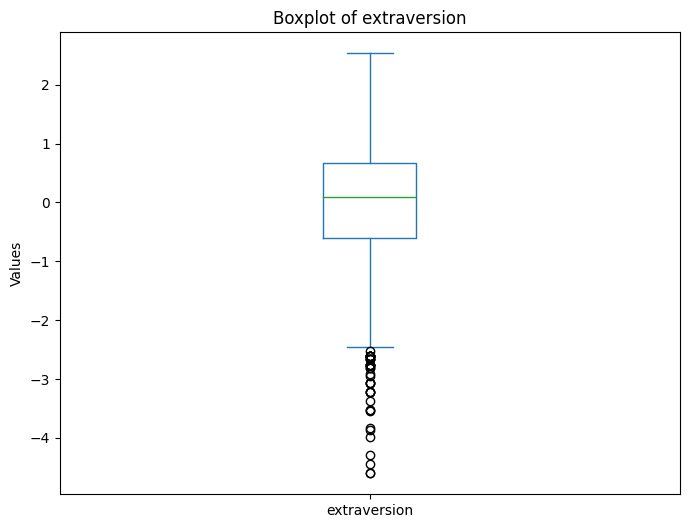

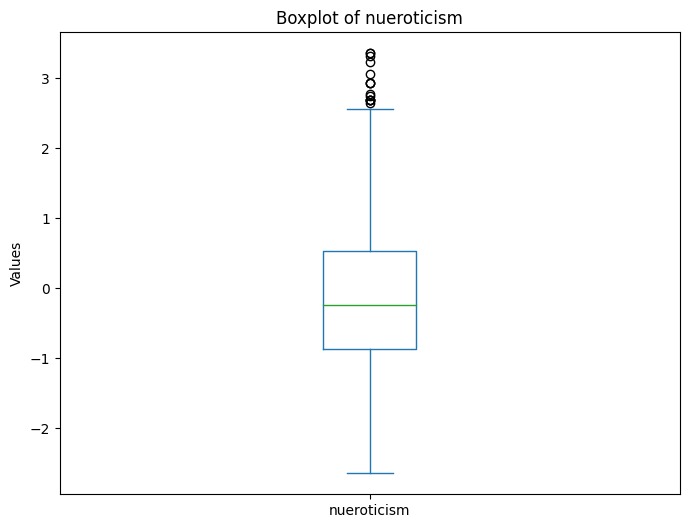

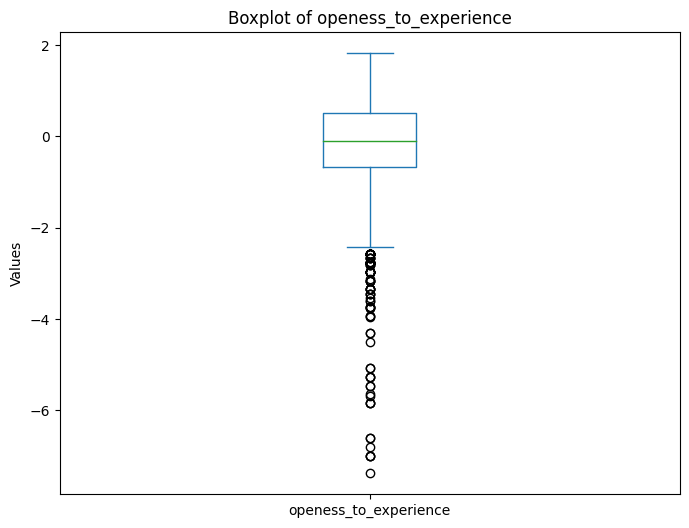

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def describe_statistics(df, columns):
    descriptions = {}
    for column in columns:
        descriptions[column] = df[column].describe()
    return descriptions

def box_plot(df, columns):
    for column in columns:
        df[column].plot(kind='box', figsize=(8, 6))
        plt.title(f"Boxplot of {column}")
        plt.ylabel("Values")
        plt.show()

# Columns on which to apply describe function
columns_to_describe = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Performing statistical analysis similar to describe() for specified columns
statistics = describe_statistics(df, columns_to_describe)
for column, description in statistics.items():
    print(f"Statistics for column '{column}':")
    print(description)
    print()

# Generate separate box plots for each column
box_plot(df, columns_to_describe)

# Univariate Analysis

In [21]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned



# Columns on which to remove outliers
columns_to_remove_outliers = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant',
                              'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Remove outliers from specified columns
df_cleaned = remove_outliers(df, columns_to_remove_outliers)

# Print cleaned DataFrame
print("Cleaned DataFrame:")
df_cleaned

# Now, you can proceed with your analysis or plotting using the cleaned DataFrame


Cleaned DataFrame:


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,1027655,300000.0,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992-07-02,89.92,state board,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,2013-07-01,2024-02-23,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned


# Columns on which to remove outliers
columns_to_remove_outliers = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant',
                              'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Remove outliers from specified columns
df_cleaned = remove_outliers(df, columns_to_remove_outliers)

# Print cleaned DataFrame
print("Cleaned DataFrame:")
df_cleaned

# Now, you can proceed with your analysis or plotting using the cleaned DataFrame


Cleaned DataFrame:


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,1027655,300000.0,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992-07-02,89.92,state board,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,2013-07-01,2024-02-23,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3571 non-null   int64         
 1   Salary                 3571 non-null   float64       
 2   DOJ                    3571 non-null   datetime64[ns]
 3   DOL                    3571 non-null   datetime64[ns]
 4   Designation            3571 non-null   object        
 5   JobCity                3571 non-null   object        
 6   Gender                 3571 non-null   object        
 7   DOB                    3571 non-null   datetime64[ns]
 8   10percentage           3571 non-null   float64       
 9   10board                3571 non-null   object        
 10  12graduation           3571 non-null   int64         
 11  12percentage           3571 non-null   float64       
 12  12board                3571 non-null   object        
 13  Col

# Univariate Analaysis
## Numerical Data Type

Text(0.5, 0, 'Salary')

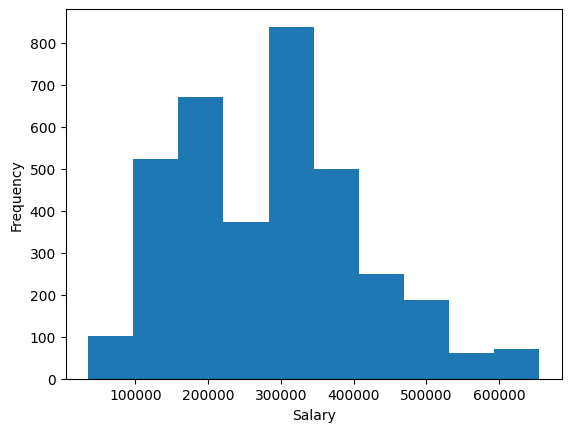

In [95]:
# It is looking like so many students were kept less marks
df_cleaned['Salary'].plot(kind="hist")
plt.xlabel('Salary')

<Axes: ylabel='Frequency'>

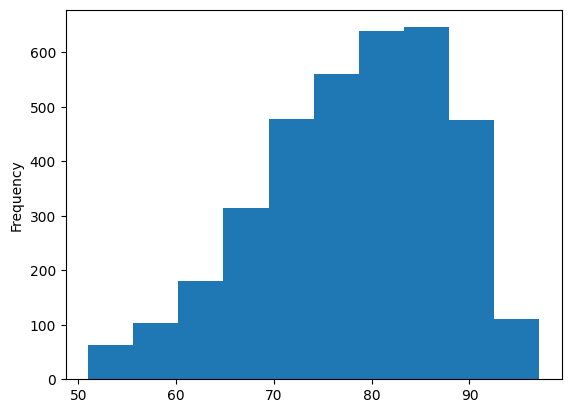

In [27]:
# It is looking like so many students were kept less marks
df_cleaned['10percentage'].plot(kind="hist")


<Axes: ylabel='Frequency'>

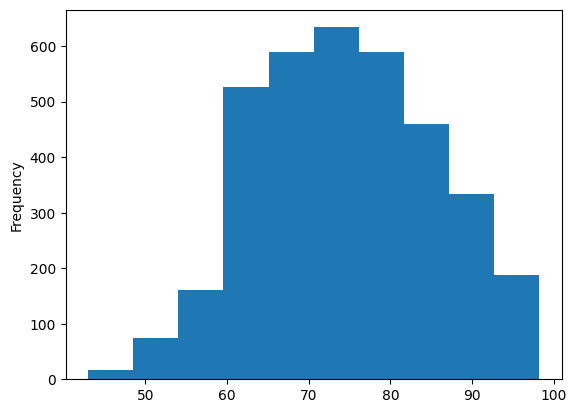

In [28]:
# So many students lies in between 60-100%
df_cleaned["12percentage"].plot(kind="hist")

Text(0, 0.5, 'frequency')

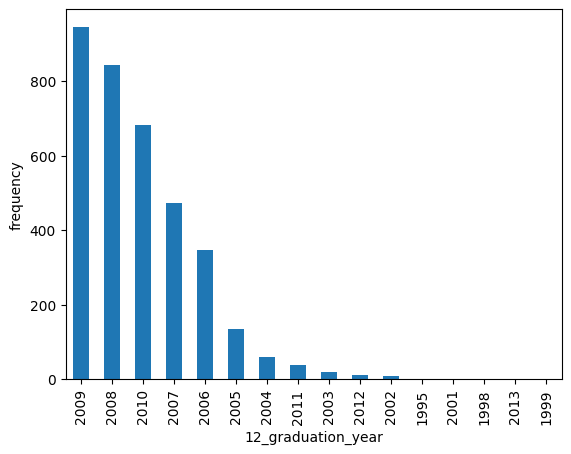

In [97]:
df_cleaned['12graduation'].value_counts().plot(kind="bar")
plt.xlabel('12_graduation_year')
plt.ylabel('frequency')

<Axes: >

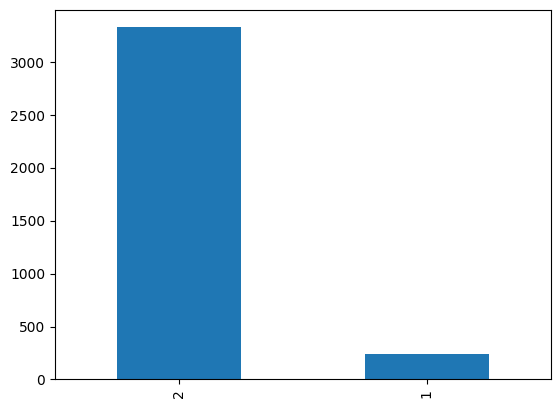

In [30]:
df_cleaned['CollegeTier'].value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

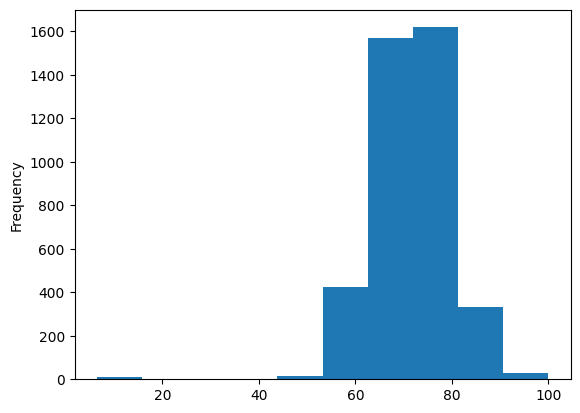

In [31]:
# 'collegeGPA'column Normally distributed
df['collegeGPA'].plot(kind="hist")

<Axes: >

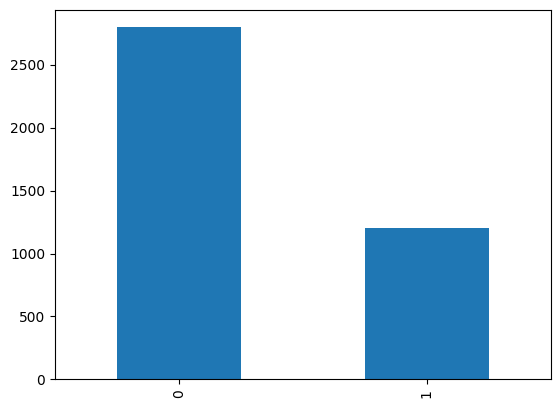

In [32]:
df['CollegeCityTier'].value_counts().plot(kind="bar")

Text(0, 0.5, 'Frequency')

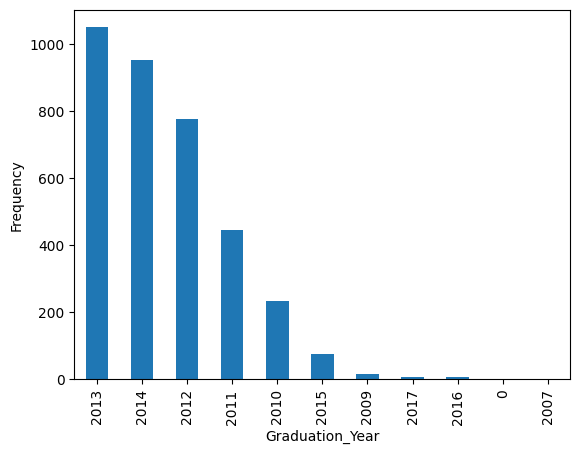

In [98]:
df_cleaned['GraduationYear'].value_counts().plot(kind="bar")
plt.xlabel('Graduation_Year')
plt.ylabel('Frequency')

<Axes: ylabel='Frequency'>

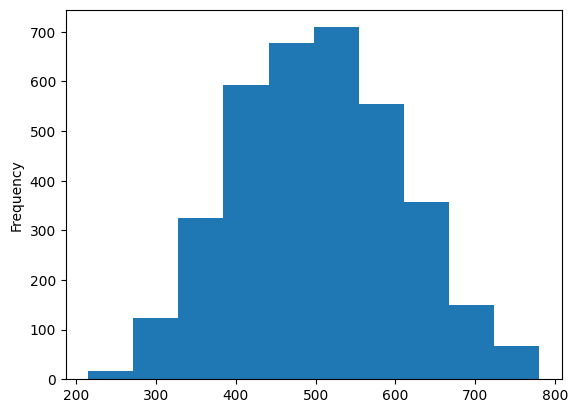

In [34]:
df_cleaned['English'].plot(kind="hist")

<Axes: ylabel='Frequency'>

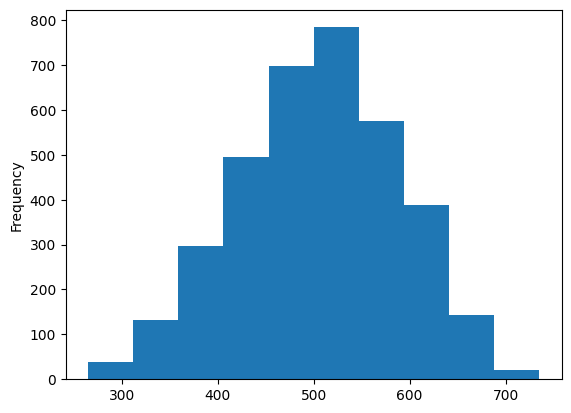

In [35]:
df_cleaned['Logical'].plot(kind="hist")

<Axes: ylabel='Frequency'>

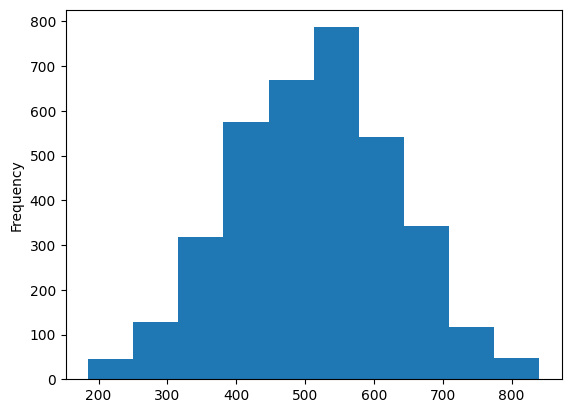

In [36]:
df_cleaned['Quant'].plot(kind="hist")

<Axes: ylabel='Frequency'>

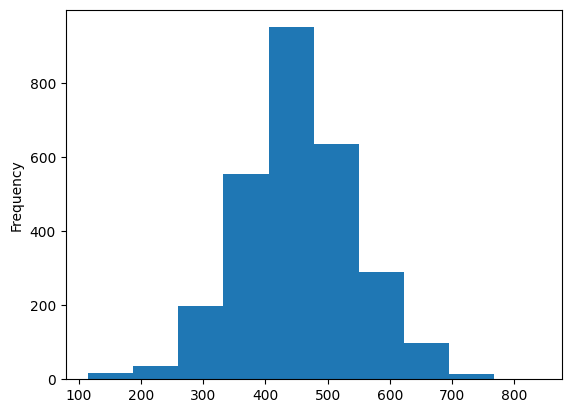

In [37]:
df_cleaned[df_cleaned['ComputerProgramming']!=-1]['ComputerProgramming'].plot(kind="hist")

<Axes: ylabel='Frequency'>

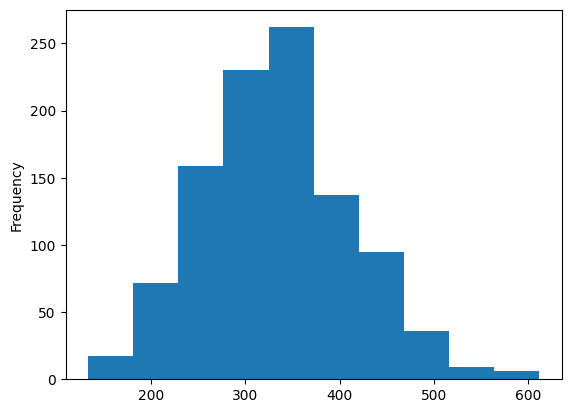

In [38]:
df_cleaned[df_cleaned['ElectronicsAndSemicon']!=-1]['ElectronicsAndSemicon'].plot(kind="hist")

<Axes: ylabel='Frequency'>

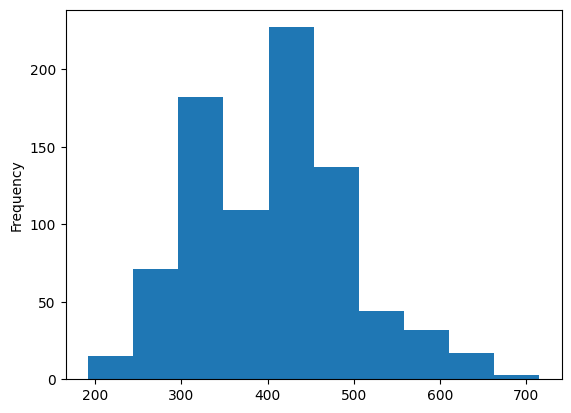

In [39]:
df_cleaned[df_cleaned['ComputerScience']!=-1]['ComputerScience'].plot(kind="hist")

<Axes: ylabel='Frequency'>

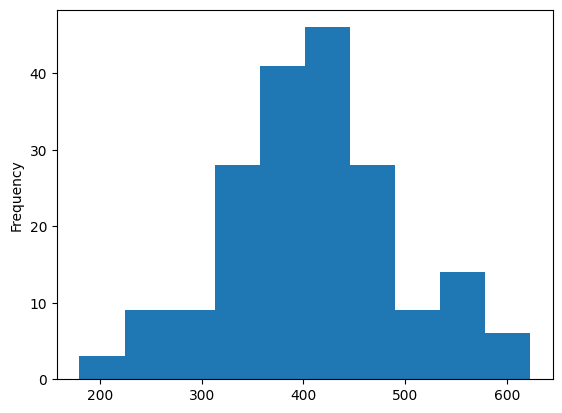

In [40]:
df_cleaned[df_cleaned['MechanicalEngg']!=-1]['MechanicalEngg'].plot(kind="hist")

<Axes: ylabel='Frequency'>

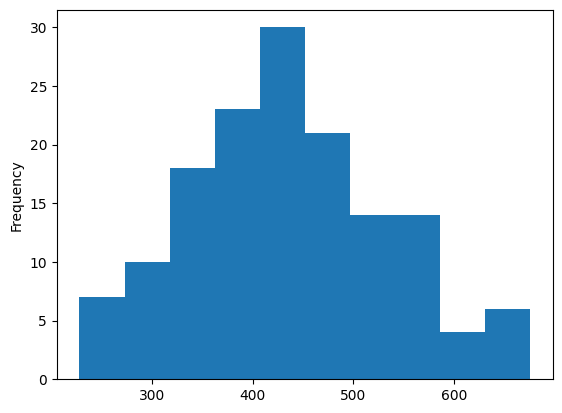

In [41]:
df_cleaned[df_cleaned['ElectricalEngg']!=-1]['ElectricalEngg'].plot(kind="hist")

<Axes: ylabel='Frequency'>

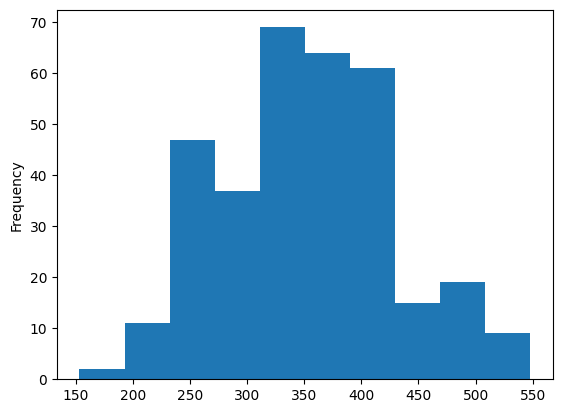

In [42]:
df_cleaned[df_cleaned['TelecomEngg']!=-1]['TelecomEngg'].plot(kind="hist")

<Axes: ylabel='Frequency'>

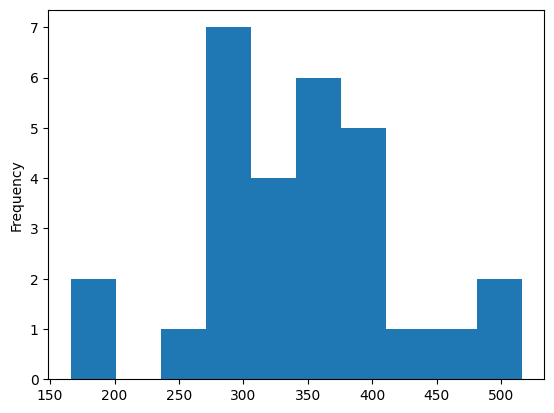

In [43]:
df_cleaned[df_cleaned['CivilEngg']!=-1]['CivilEngg'].plot(kind="hist")

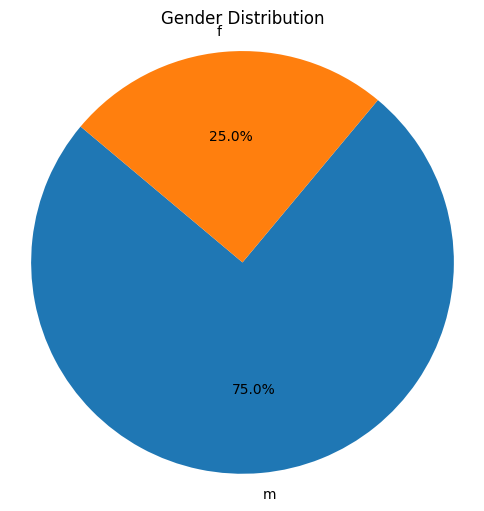

In [101]:
gender_counts = df_cleaned['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

# For Categorical Data

<Axes: >

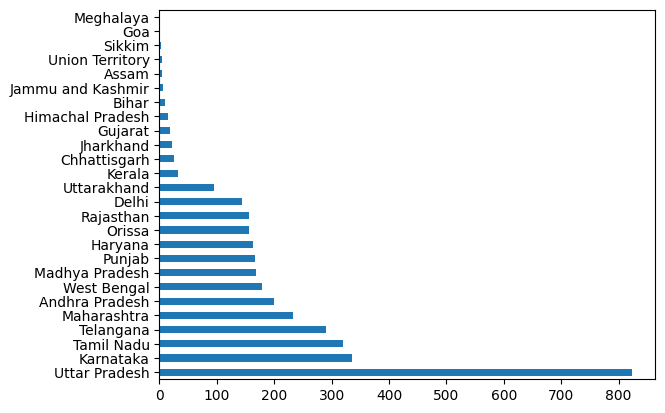

In [45]:
df_cleaned['CollegeState'].value_counts().plot(kind="barh")

<Axes: >

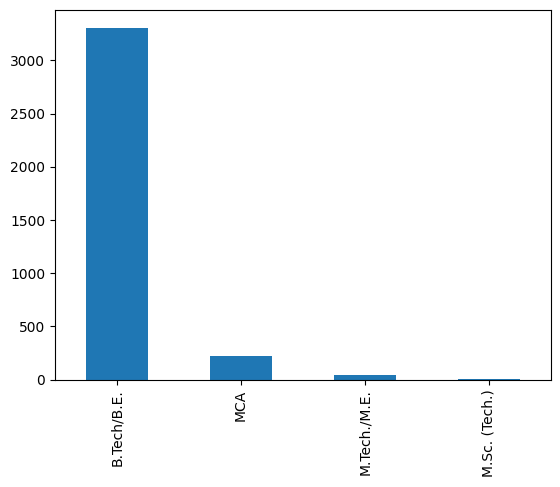

In [46]:
df_cleaned['Degree'].value_counts().plot(kind='bar')

<Axes: >

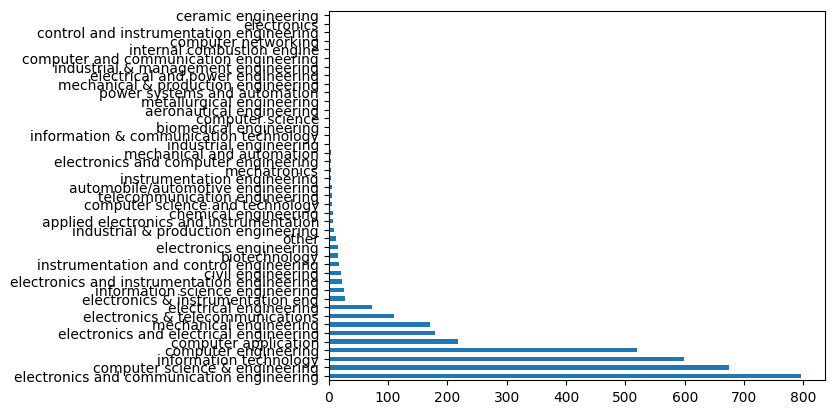

In [47]:
df_cleaned['Specialization'].value_counts().plot(kind='barh')

<Axes: >

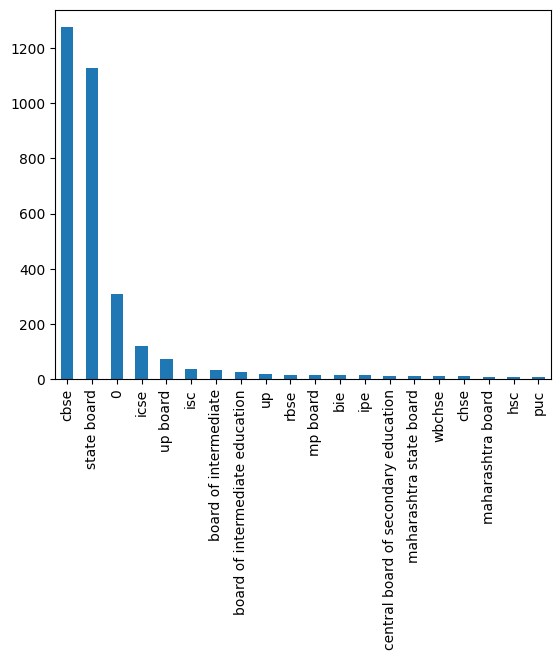

In [48]:
df_cleaned['12board'].value_counts().head(20).plot(kind="bar")

<Axes: >

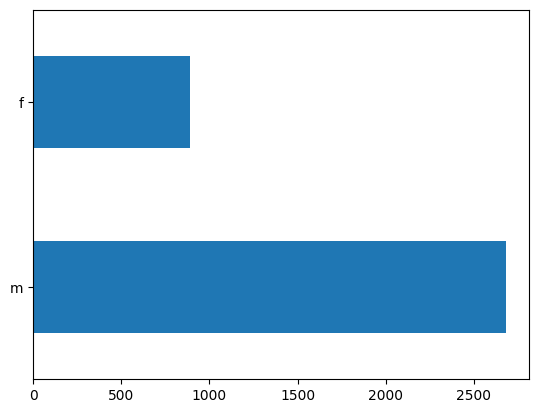

In [49]:
df_cleaned['Gender'].value_counts().plot(kind='barh')

<Axes: >

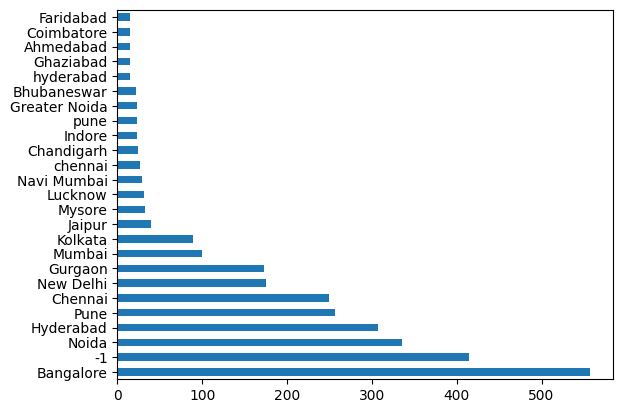

In [50]:
df_cleaned['JobCity'].value_counts().head(25).plot(kind="barh")

# Bivariate Analysis

In [51]:
df_cleaned['Designation'].value_counts().head(10)

software engineer             496
software developer            238
system engineer               189
programmer analyst            129
systems engineer              109
java software engineer        100
software test engineer         85
technical support engineer     72
project engineer               68
java developer                 62
Name: Designation, dtype: int64

In [52]:
df_cleaned.Salary

0       420000.0
1       500000.0
2       325000.0
4       200000.0
5       300000.0
          ...   
3993    280000.0
3994    100000.0
3995    320000.0
3996    200000.0
3997    400000.0
Name: Salary, Length: 3571, dtype: float64

In [53]:
designation_salary = df_cleaned[['Designation', 'Salary']]

# Sort by salary in descending order
sorted_designations = designation_salary.sort_values(by='Salary', ascending=False)

# Display the top 10 designations
top_10_designations = sorted_designations.head(10)
print(top_10_designations)

                      Designation    Salary
1996       software test engineer  655000.0
3753         technical consultant  655000.0
3692        application developer  650000.0
3659           technology analyst  650000.0
1253       database administrator  650000.0
2393  business analyst consultant  650000.0
1312          it business analyst  650000.0
1313            assistant manager  650000.0
3946     senior software engineer  650000.0
1777           technology analyst  650000.0


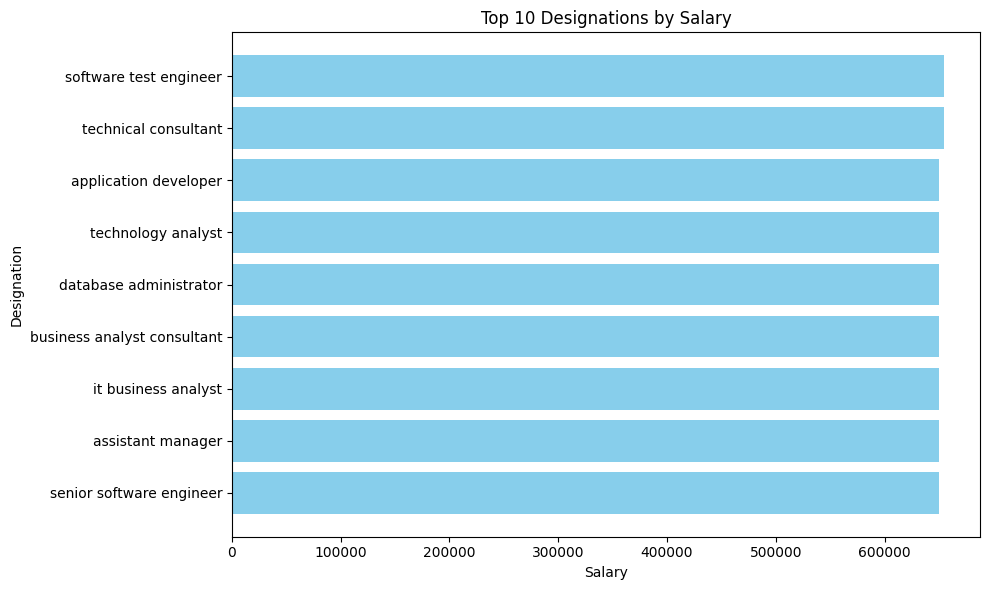

In [54]:
designations = top_10_designations['Designation']
salaries = top_10_designations['Salary']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(designations, salaries, color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.title('Top 10 Designations by Salary')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest salary at the top
plt.tight_layout()
plt.show()

In [55]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [56]:
df_cleaned.Specialization.value_counts()

electronics and communication engineering      796
computer science & engineering                 674
information technology                         598
computer engineering                           520
computer application                           218
electronics and electrical engineering         179
mechanical engineering                         170
electronics & telecommunications               110
electrical engineering                          73
electronics & instrumentation eng               28
information science engineering                 25
electronics and instrumentation engineering     23
civil engineering                               20
instrumentation and control engineering         17
biotechnology                                   15
electronics engineering                         15
other                                           13
industrial & production engineering              9
applied electronics and instrumentation          8
chemical engineering           

In [57]:


# Extract specialization and salary columns
specialization_salary = df_cleaned[['Specialization', 'Salary']]

# Group by specialization and calculate the average salary for each specialization
average_salary_by_specialization = specialization_salary.groupby('Specialization').mean()

# Sort the average salaries in descending order and select the top 10
top_10_specializations = average_salary_by_specialization.sort_values(by='Salary', ascending=False).head(10)

print(top_10_specializations)


                                               Salary
Specialization                                       
computer networking                     565000.000000
information & communication technology  387500.000000
industrial engineering                  370000.000000
internal combustion engine              360000.000000
industrial & production engineering     353888.888889
telecommunication engineering           342500.000000
metallurgical engineering               337500.000000
mechanical and automation               335000.000000
ceramic engineering                     335000.000000
computer engineering                    334894.230769


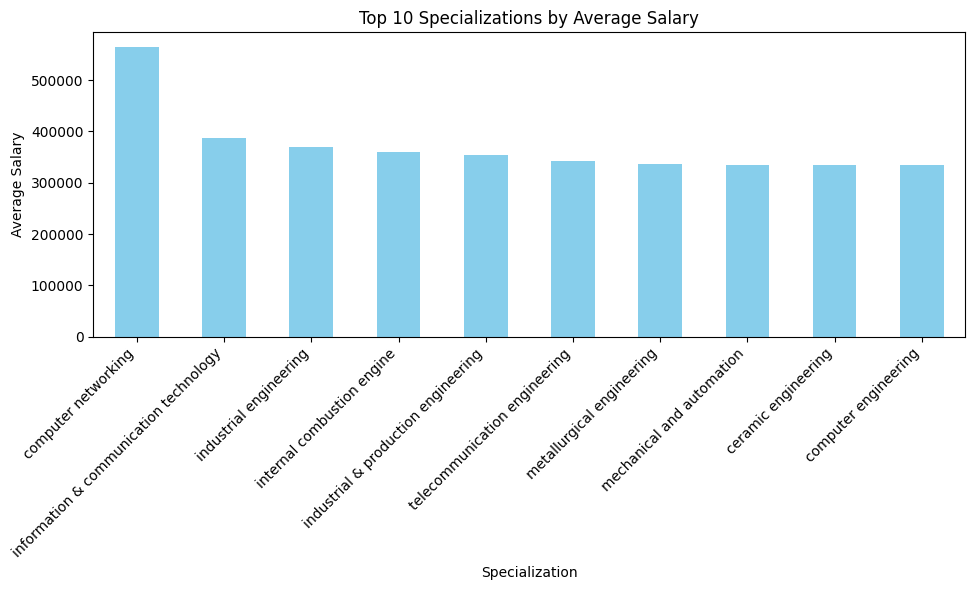

In [58]:
import matplotlib.pyplot as plt

# Plotting the top 10 specializations
plt.figure(figsize=(10, 6))
top_10_specializations['Salary'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Specializations by Average Salary')
plt.xlabel('Specialization')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [59]:
df.dtypes

ID                                int64
Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


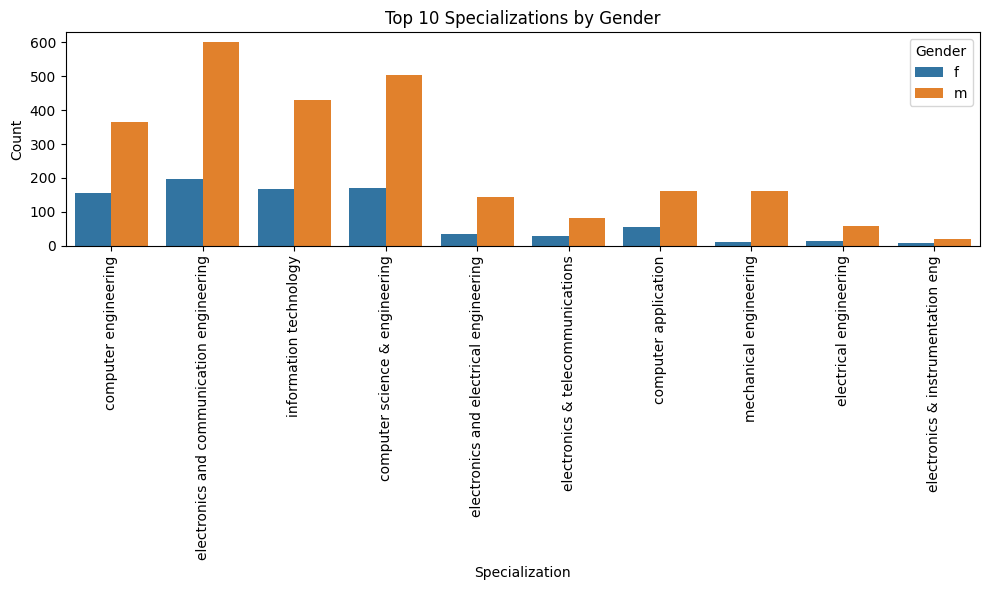

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame containing 'Specialization' and 'Gender' columns

# Get the top 10 most frequent specializations
top_10_specializations = df_cleaned['Specialization'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 specializations
df_top_10 = df_cleaned[df_cleaned['Specialization'].isin(top_10_specializations)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10, x='Specialization', hue='Gender')
plt.title('Top 10 Specializations by Gender')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

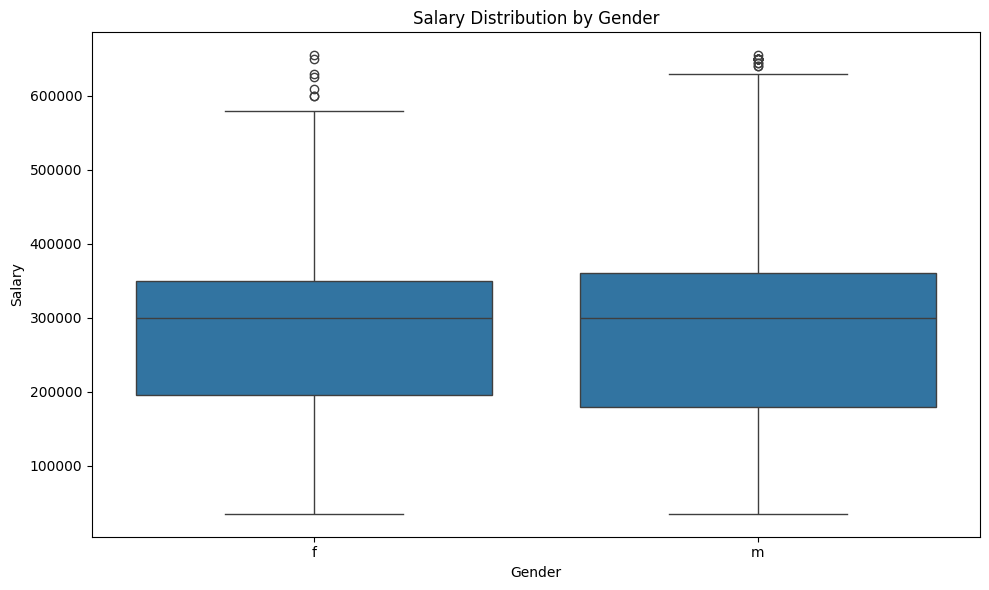

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Gender', y='Salary')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [67]:
df_cleaned.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

<ipython-input-69-93ffdc23cefd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_salaries.values, y=top_10_salaries.index, palette='viridis')


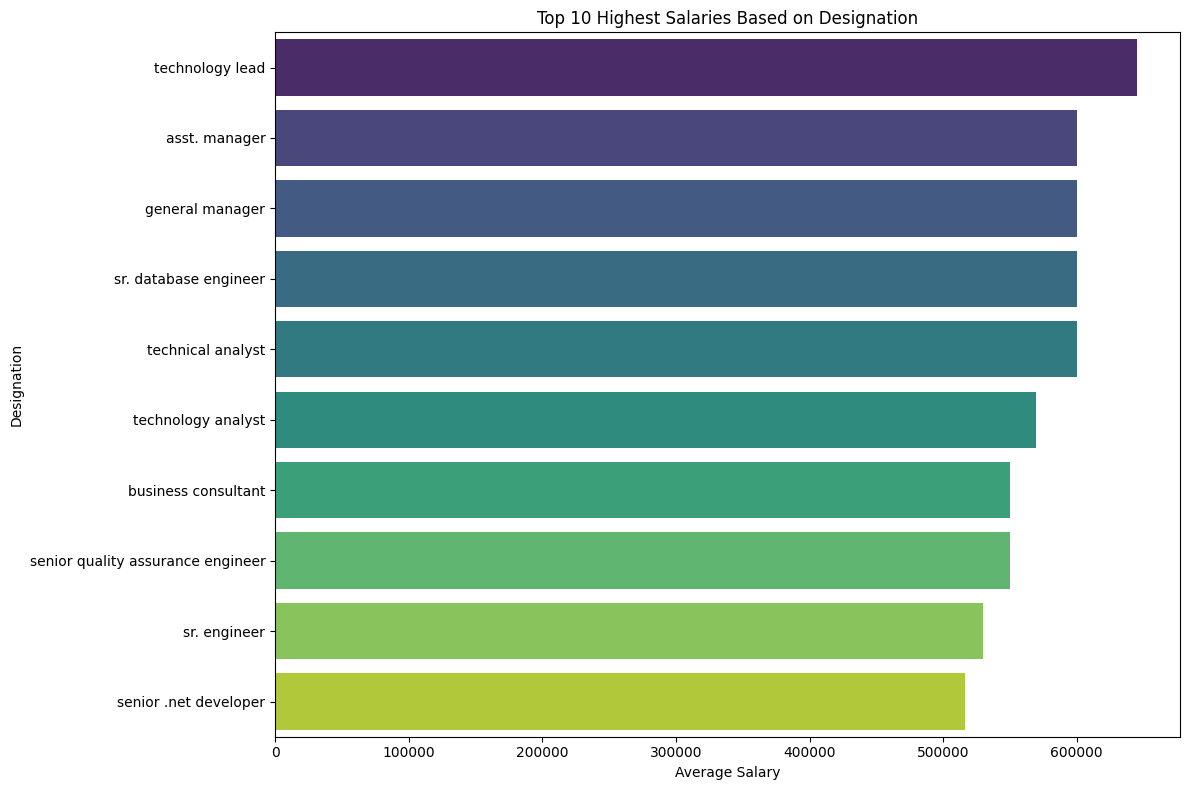

In [69]:
# Get the top 10 highest salaries based on designation
top_10_salaries = df_cleaned.groupby('Designation')['Salary'].mean().nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_salaries.values, y=top_10_salaries.index, palette='viridis')
plt.title('Top 10 Highest Salaries Based on Designation')
plt.xlabel('Average Salary')
plt.ylabel('Designation')
plt.tight_layout()
plt.show()

In [78]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [84]:
from scipy.stats import chi2_contingency


# Create contingency table of observed counts
cont_table = pd.crosstab(df_cleaned['Gender'], df_cleaned['Specialization'])

# Calculate expected counts assuming independence
chi2, p, dof, expected = chi2_contingency(cont_table)

# Print results
print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print("Contingency Table (Observed Counts):\n", cont_table)
print("Contingency Table (Expected Counts):\n", pd.DataFrame(expected, index=cont_table.index, columns=cont_table.columns))

Chi-Squared Statistic: 88.41
P-value: 0.0000
Contingency Table (Observed Counts):
 Specialization  aeronautical engineering  \
Gender                                     
f                                      1   
m                                      1   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                                     2   
m                                                     6   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                               0                       2   
m                                               5                       0   

Specialization  biotechnology  ceramic engineering  chemical engineering  \
Gender                                                                     
f                           9             